# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

15:55:16 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=739984;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=415410;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#47\47]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=874809;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=272213;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#68\68]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=550976;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=808357;file:///Users/runner/miniconda3/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

15:55:18 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=372093;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=364974;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

15:55:19 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=459679;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=461765;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

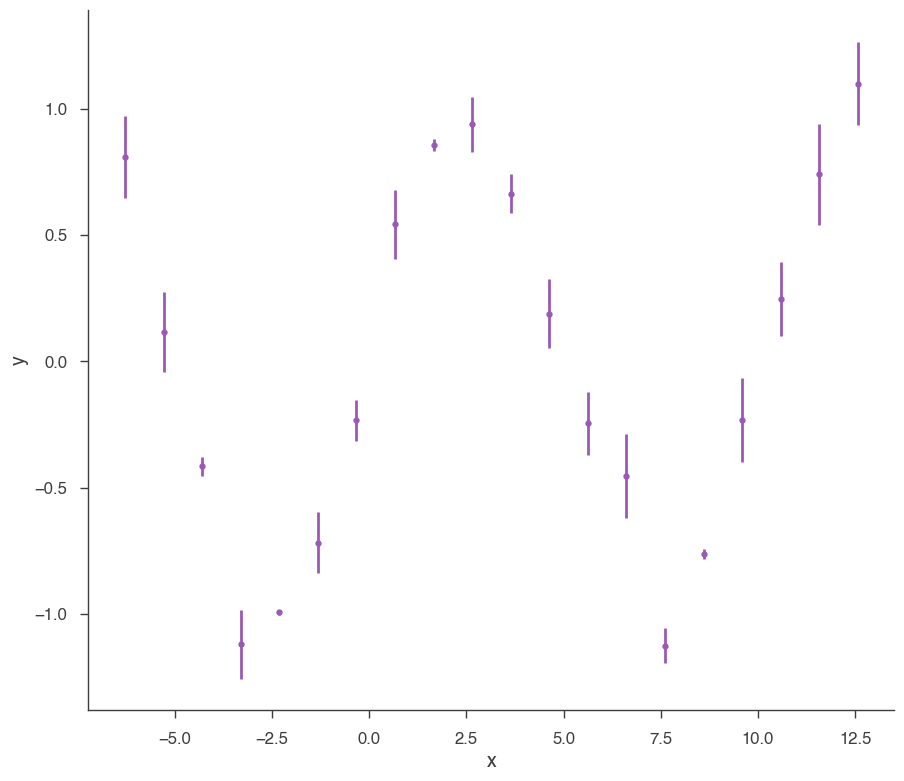

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

15:55:20 INFO      sampler set to emcee                                                    ]8;id=129015;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=167101;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

15:55:23 INFO      Mean acceptance fraction: 0.7129                                            ]8;id=312990;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=418674;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

15:55:24 INFO      fit restored to maximum of posterior                                         ]8;id=991330;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=60518;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=607500;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=424098;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.99 +/- 0.09) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(10.00 -0.05 +0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.293866
total,-9.293866


Values of statistical measures:

,statistical measures
AIC,23.293614
BIC,24.579197
DIC,22.642575
PDIC,2.024821


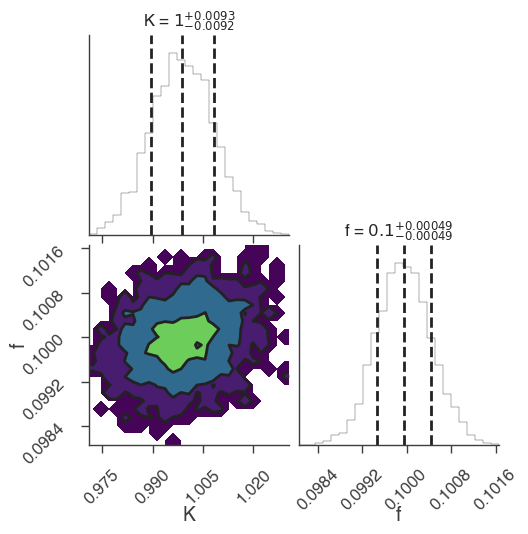

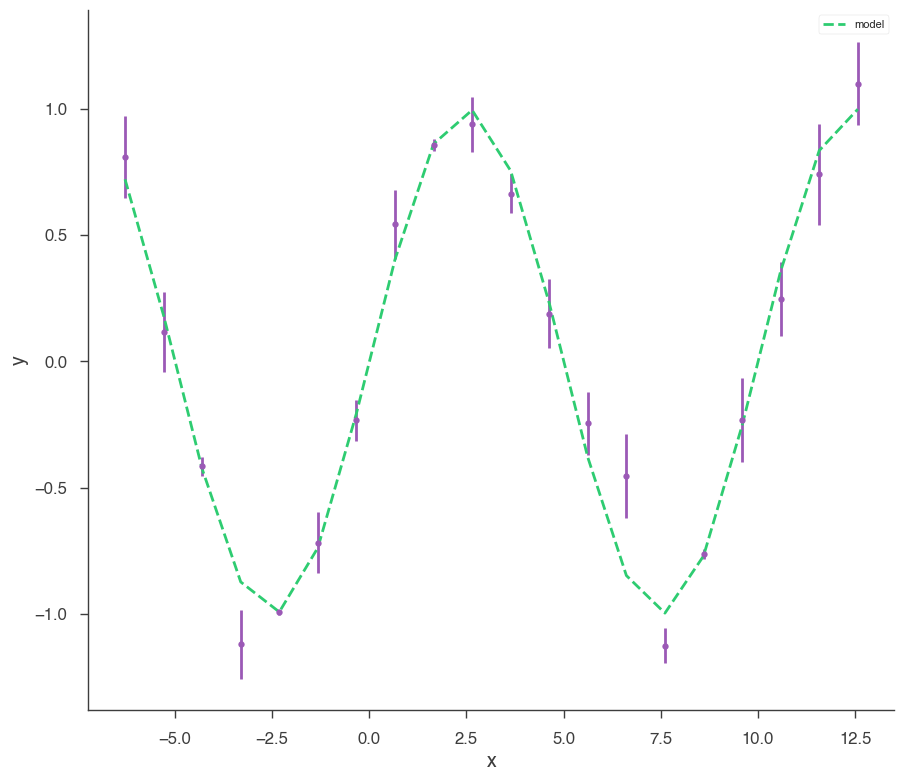

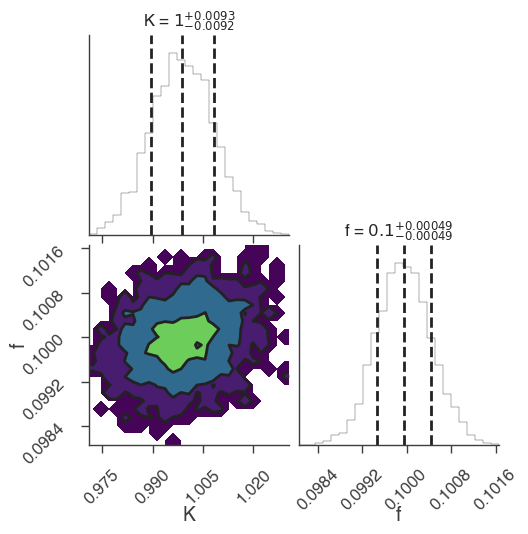

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

15:55:25 INFO      sampler set to multinest                                                ]8;id=337473;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=138923;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -19.128609425433254      +/-  0.14806638512494588     
 Total Likelihood Evaluations:         6554
 Sampling finished. Exiting MultiNest



15:55:26 INFO      fit restored to maximum of posterior                                         ]8;id=814323;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=785565;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=692832;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=772998;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.99 -0.09 +0.10) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.000 -0.006 +0.005) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.294327
total,-9.294327


Values of statistical measures:

,statistical measures
AIC,23.294537
BIC,24.580119
DIC,22.773878
PDIC,2.091428
log(Z),-8.307450


         INFO      deleting the chain directory chains                                     ]8;id=643170;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=411953;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

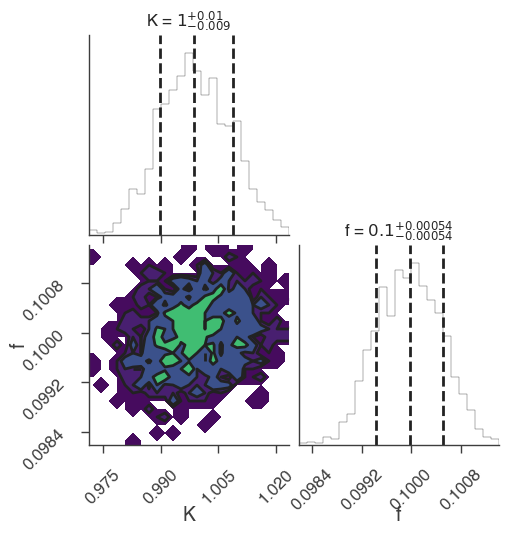

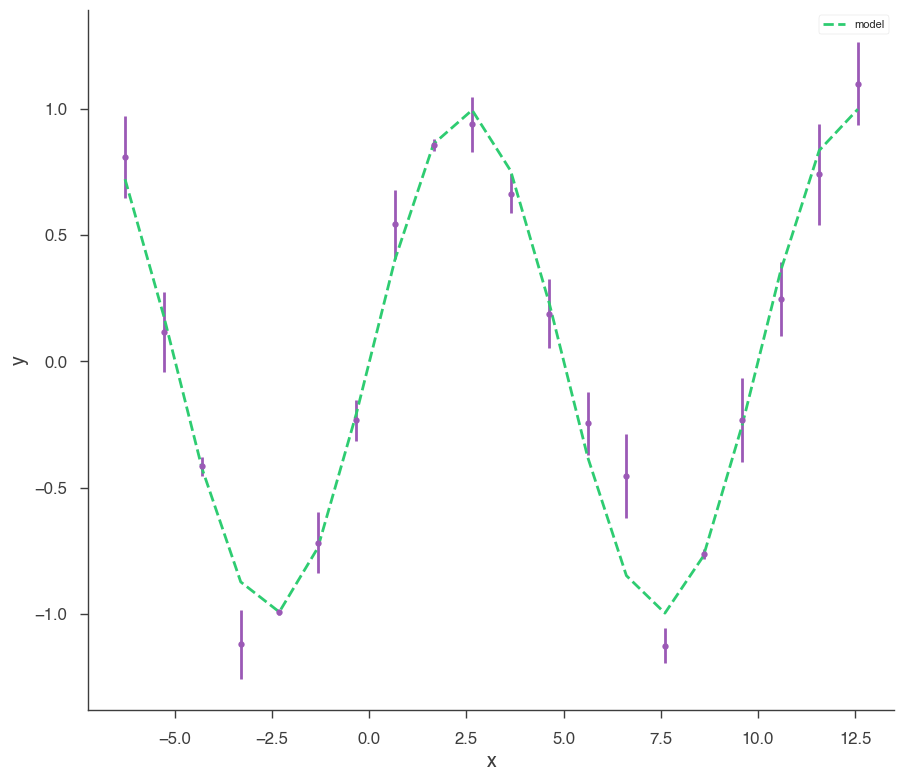

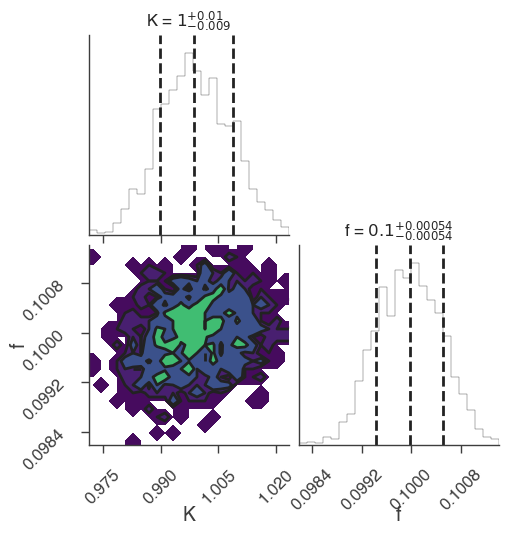

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

         INFO      sampler set to dynesty_nested                                           ]8;id=83635;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=203254;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

266it [00:00, 2658.48it/s, bound: 0 | nc: 2 | ncall: 777 | eff(%): 34.234 | loglstar:   -inf < -6898.317 <    inf | logz: -6905.666 +/-  0.135 | dlogz: 6885.048 >  0.409]

532it [00:00, 1853.18it/s, bound: 0 | nc: 8 | ncall: 1492 | eff(%): 35.657 | loglstar:   -inf < -4584.016 <    inf | logz: -4591.989 +/-  0.140 | dlogz: 4581.794 >  0.409]

732it [00:00, 1551.93it/s, bound: 0 | nc: 16 | ncall: 2390 | eff(%): 30.628 | loglstar:   -inf < -3356.929 <    inf | logz: -3365.437 +/-  0.146 | dlogz: 3356.866 >  0.409]

897it [00:00, 1230.32it/s, bound: 0 | nc: 14 | ncall: 3422 | eff(%): 26.213 | loglstar:   -inf < -2075.807 <    inf | logz: -2084.732 +/-  0.149 | dlogz: 2093.140 >  0.409]

1031it [00:00, 976.23it/s, bound: 0 | nc: 7 | ncall: 4745 | eff(%): 21.728 | loglstar:   -inf < -1269.036 <    inf | logz: -1278.176 +/-  0.148 | dlogz: 1265.679 >  0.409] 

1139it [00:01, 826.34it/s, bound: 0 | nc: 20 | ncall: 6173 | eff(%): 18.451 | loglstar:   -inf < -966.403 <    inf | logz: -975.332 +/-  0.143 | dlogz: 960.780 >  0.409]  

1229it [00:01, 661.10it/s, bound: 0 | nc: 13 | ncall: 7796 | eff(%): 15.764 | loglstar:   -inf < -741.998 <    inf | logz: -751.735 +/-  0.155 | dlogz: 742.636 >  0.409]

1302it [00:01, 544.73it/s, bound: 0 | nc: 8 | ncall: 9412 | eff(%): 13.833 | loglstar:   -inf < -634.576 <    inf | logz: -642.909 +/-  0.140 | dlogz: 629.732 >  0.409] 

1362it [00:01, 465.07it/s, bound: 0 | nc: 84 | ncall: 11017 | eff(%): 12.363 | loglstar:   -inf < -556.149 <    inf | logz: -566.037 +/-  0.153 | dlogz: 554.537 >  0.409]

1413it [00:01, 415.52it/s, bound: 0 | nc: 51 | ncall: 12455 | eff(%): 11.345 | loglstar:   -inf < -495.350 <    inf | logz: -504.134 +/-  0.141 | dlogz: 490.722 >  0.409]

1457it [00:02, 365.59it/s, bound: 0 | nc: 10 | ncall: 13693 | eff(%): 10.640 | loglstar:   -inf < -445.140 <    inf | logz: -454.300 +/-  0.144 | dlogz: 441.282 >  0.409]

1495it [00:02, 340.98it/s, bound: 0 | nc: 9 | ncall: 14804 | eff(%): 10.099 | loglstar:   -inf < -413.844 <    inf | logz: -422.947 +/-  0.145 | dlogz: 410.494 >  0.409] 

1530it [00:02, 207.88it/s, bound: 1 | nc: 2 | ncall: 15076 | eff(%): 10.149 | loglstar:   -inf < -385.724 <    inf | logz: -395.322 +/-  0.147 | dlogz: 382.997 >  0.409]

1747it [00:02, 491.40it/s, bound: 1 | nc: 4 | ncall: 15490 | eff(%): 11.278 | loglstar:   -inf < -250.602 <    inf | logz: -259.947 +/-  0.145 | dlogz: 246.594 >  0.409]

1831it [00:02, 484.01it/s, bound: 2 | nc: 1 | ncall: 15667 | eff(%): 11.687 | loglstar:   -inf < -207.641 <    inf | logz: -216.570 +/-  0.146 | dlogz: 202.885 >  0.409]

1996it [00:03, 689.94it/s, bound: 2 | nc: 3 | ncall: 15934 | eff(%): 12.527 | loglstar:   -inf < -152.111 <    inf | logz: -162.096 +/-  0.150 | dlogz: 148.143 >  0.409]

2132it [00:03, 657.25it/s, bound: 3 | nc: 1 | ncall: 16240 | eff(%): 13.128 | loglstar:   -inf < -117.498 <    inf | logz: -127.504 +/-  0.150 | dlogz: 113.122 >  0.409]

2370it [00:03, 978.58it/s, bound: 3 | nc: 1 | ncall: 16628 | eff(%): 14.253 | loglstar:   -inf < -72.394 <    inf | logz: -82.114 +/-  0.149 | dlogz: 67.007 >  0.409]   

2504it [00:03, 863.87it/s, bound: 4 | nc: 3 | ncall: 16890 | eff(%): 14.825 | loglstar:   -inf < -56.674 <    inf | logz: -66.786 +/-  0.152 | dlogz: 51.351 >  0.409]

2729it [00:03, 1137.37it/s, bound: 4 | nc: 2 | ncall: 17281 | eff(%): 15.792 | loglstar:   -inf < -37.231 <    inf | logz: -47.413 +/-  0.152 | dlogz: 31.368 >  0.409]

2876it [00:03, 1012.80it/s, bound: 5 | nc: 1 | ncall: 17556 | eff(%): 16.382 | loglstar:   -inf < -29.330 <    inf | logz: -39.337 +/-  0.150 | dlogz: 22.892 >  0.409]

3017it [00:03, 1095.13it/s, bound: 5 | nc: 1 | ncall: 17793 | eff(%): 16.956 | loglstar:   -inf < -24.037 <    inf | logz: -34.292 +/-  0.151 | dlogz: 17.492 >  0.409]

3148it [00:04, 932.53it/s, bound: 6 | nc: 1 | ncall: 18068 | eff(%): 17.423 | loglstar:   -inf < -20.298 <    inf | logz: -30.472 +/-  0.152 | dlogz: 13.332 >  0.409] 

3338it [00:04, 1135.76it/s, bound: 6 | nc: 3 | ncall: 18328 | eff(%): 18.213 | loglstar:   -inf < -16.256 <    inf | logz: -26.589 +/-  0.152 | dlogz:  8.968 >  0.409]

3480it [00:04, 1198.86it/s, bound: 6 | nc: 5 | ncall: 18620 | eff(%): 18.690 | loglstar:   -inf < -14.480 <    inf | logz: -24.654 +/-  0.152 | dlogz:  6.673 >  0.409]

3617it [00:04, 1010.36it/s, bound: 7 | nc: 2 | ncall: 18810 | eff(%): 19.229 | loglstar:   -inf < -12.878 <    inf | logz: -23.219 +/-  0.152 | dlogz:  4.900 >  0.409]

3774it [00:04, 1133.79it/s, bound: 7 | nc: 6 | ncall: 19128 | eff(%): 19.730 | loglstar:   -inf < -11.645 <    inf | logz: -21.999 +/-  0.153 | dlogz:  3.319 >  0.409]

3903it [00:04, 1016.31it/s, bound: 8 | nc: 1 | ncall: 19344 | eff(%): 20.177 | loglstar:   -inf < -11.003 <    inf | logz: -21.328 +/-  0.153 | dlogz:  2.384 >  0.409]

4131it [00:04, 1306.89it/s, bound: 8 | nc: 2 | ncall: 19734 | eff(%): 20.933 | loglstar:   -inf < -10.218 <    inf | logz: -20.554 +/-  0.153 | dlogz:  1.271 >  0.409]

4279it [00:05, 1122.93it/s, bound: 9 | nc: 1 | ncall: 19959 | eff(%): 21.439 | loglstar:   -inf < -9.951 <    inf | logz: -20.245 +/-  0.153 | dlogz:  0.833 >  0.409] 

4480it [00:05, 1323.74it/s, bound: 9 | nc: 2 | ncall: 20305 | eff(%): 22.064 | loglstar:   -inf < -9.673 <    inf | logz: -19.977 +/-  0.153 | dlogz:  0.474 >  0.409]

4532it [00:05, 853.14it/s, +400 | bound: 9 | nc: 1 | ncall: 20837 | eff(%): 24.133 | loglstar:   -inf < -9.295 <    inf | logz: -19.567 +/-  0.152 | dlogz:  0.001 >  0.409]

15:55:32 INFO      fit restored to maximum of posterior                                         ]8;id=273233;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=465271;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=634722;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=471705;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.99 +/- 0.09) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(10.00 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.294414
total,-9.294414


Values of statistical measures:

,statistical measures
AIC,23.294710
BIC,24.580292
DIC,22.430963
PDIC,1.919924
log(Z),-8.497749


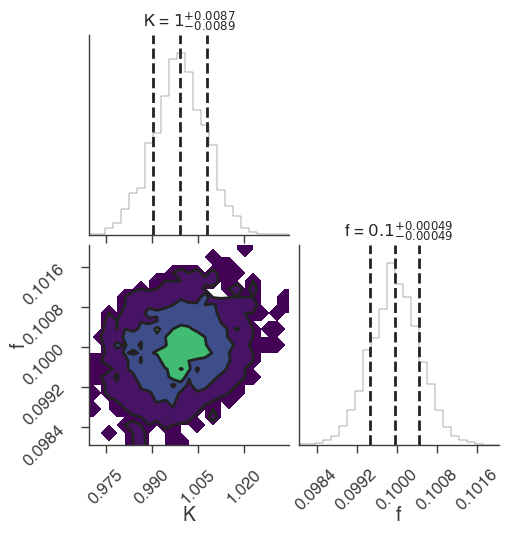

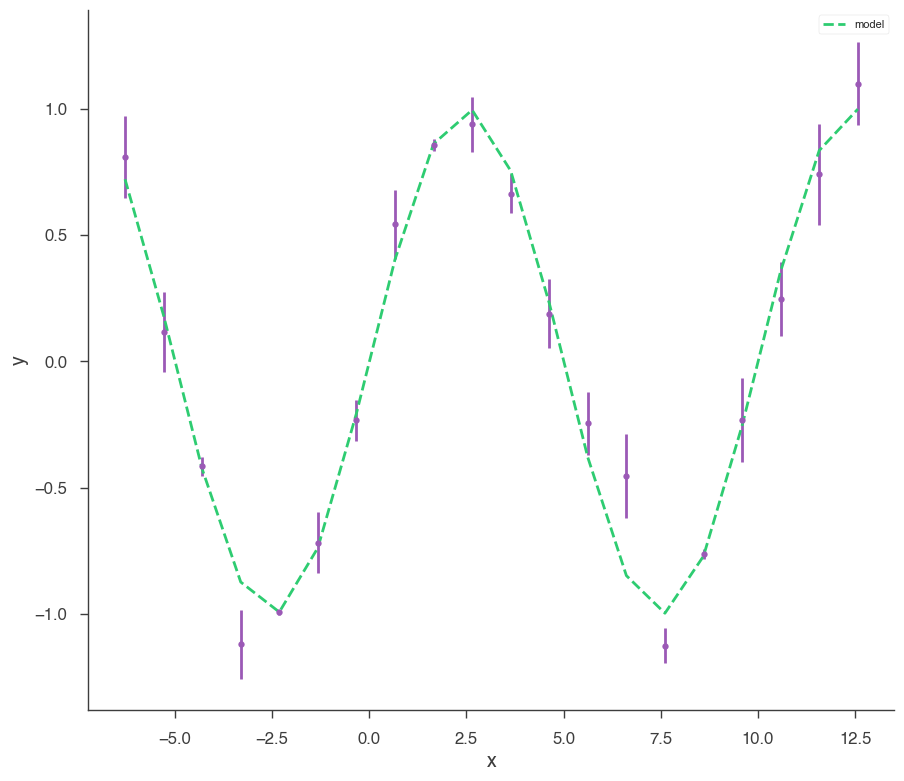

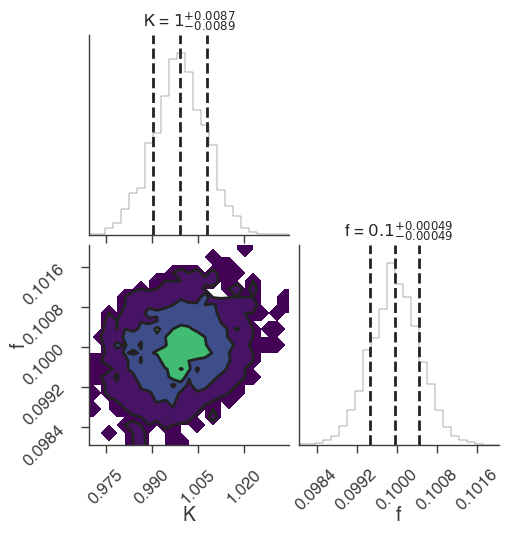

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

15:55:33 INFO      sampler set to dynesty_dynamic                                          ]8;id=43696;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=479266;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

69it [00:00, 689.12it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 74 | eff(%): 12.021 | loglstar:   -inf < -18770.284 <    inf | logz: -18777.330 +/-  0.119 | dlogz: 18794.226 >  0.010]

242it [00:00, 1300.09it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 326 | eff(%): 29.298 | loglstar:   -inf < -8273.553 <    inf | logz: -8280.933 +/-  0.121 | dlogz: 8272.219 >  0.010]

442it [00:00, 1617.85it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 756 | eff(%): 35.191 | loglstar:   -inf < -5777.808 <    inf | logz: -5785.307 +/-  0.119 | dlogz: 5773.059 >  0.010]

604it [00:00, 1450.84it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1245 | eff(%): 34.613 | loglstar:   -inf < -4439.524 <    inf | logz: -4447.277 +/-  0.120 | dlogz: 4434.460 >  0.010]

752it [00:00, 1278.93it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 1856 | eff(%): 31.919 | loglstar:   -inf < -3660.301 <    inf | logz: -3668.475 +/-  0.124 | dlogz: 3655.796 >  0.010]

884it [00:00, 1168.96it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 2501 | eff(%): 29.457 | loglstar:   -inf < -3015.160 <    inf | logz: -3023.481 +/-  0.125 | dlogz: 3010.193 >  0.010] 

1005it [00:00, 979.44it/s, batch: 0 | bound: 0 | nc: 30 | ncall: 3462 | eff(%): 25.366 | loglstar:   -inf < -1950.260 <    inf | logz: -1959.175 +/-  0.133 | dlogz: 1952.651 >  0.010]

1109it [00:01, 840.75it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 4455 | eff(%): 22.381 | loglstar:   -inf < -1464.386 <    inf | logz: -1473.333 +/-  0.131 | dlogz: 1460.152 >  0.010] 

1199it [00:01, 715.27it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 5459 | eff(%): 20.121 | loglstar:   -inf < -1188.503 <    inf | logz: -1196.624 +/-  0.125 | dlogz: 1181.638 >  0.010]

1276it [00:01, 628.08it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 6543 | eff(%): 18.117 | loglstar:   -inf < -1013.336 <    inf | logz: -1021.908 +/-  0.122 | dlogz: 1006.679 >  0.010]

1343it [00:01, 529.27it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 7682 | eff(%): 16.414 | loglstar:   -inf < -895.884 <    inf | logz: -904.145 +/-  0.126 | dlogz: 889.964 >  0.010]    

1400it [00:01, 481.97it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 8655 | eff(%): 15.292 | loglstar:   -inf < -786.040 <    inf | logz: -794.693 +/-  0.127 | dlogz: 781.502 >  0.010]

1451it [00:01, 427.06it/s, batch: 0 | bound: 0 | nc: 24 | ncall: 9871 | eff(%): 13.991 | loglstar:   -inf < -700.539 <    inf | logz: -708.847 +/-  0.127 | dlogz: 696.533 >  0.010]

1496it [00:02, 398.25it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 10830 | eff(%): 13.204 | loglstar:   -inf < -646.098 <    inf | logz: -655.792 +/-  0.135 | dlogz: 644.983 >  0.010]

1537it [00:02, 391.21it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 11613 | eff(%): 12.689 | loglstar:   -inf < -604.643 <    inf | logz: -613.707 +/-  0.127 | dlogz: 601.467 >  0.010]

1577it [00:02, 358.82it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 12482 | eff(%): 12.148 | loglstar:   -inf < -558.845 <    inf | logz: -567.684 +/-  0.130 | dlogz: 555.241 >  0.010] 

1614it [00:02, 317.02it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 13577 | eff(%): 11.466 | loglstar:   -inf < -527.530 <    inf | logz: -536.493 +/-  0.130 | dlogz: 524.209 >  0.010]

1647it [00:02, 285.44it/s, batch: 0 | bound: 0 | nc: 48 | ncall: 14674 | eff(%): 10.854 | loglstar:   -inf < -497.856 <    inf | logz: -506.267 +/-  0.125 | dlogz: 493.609 >  0.010]

1677it [00:02, 288.08it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 15359 | eff(%): 10.574 | loglstar:   -inf < -471.377 <    inf | logz: -481.383 +/-  0.138 | dlogz: 470.362 >  0.010]

1707it [00:02, 265.61it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 16291 | eff(%): 10.166 | loglstar:   -inf < -438.173 <    inf | logz: -447.389 +/-  0.128 | dlogz: 434.828 >  0.010]

1734it [00:03, 214.97it/s, batch: 0 | bound: 1 | nc: 5 | ncall: 16727 | eff(%): 10.066 | loglstar:   -inf < -423.825 <    inf | logz: -431.857 +/-  0.123 | dlogz: 418.835 >  0.010] 

1892it [00:03, 508.61it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 16996 | eff(%): 10.814 | loglstar:   -inf < -322.799 <    inf | logz: -332.784 +/-  0.136 | dlogz: 320.435 >  0.010]

2027it [00:03, 706.21it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17284 | eff(%): 11.398 | loglstar:   -inf < -265.335 <    inf | logz: -275.003 +/-  0.132 | dlogz: 262.103 >  0.010]

2112it [00:03, 545.94it/s, batch: 0 | bound: 2 | nc: 3 | ncall: 17480 | eff(%): 11.746 | loglstar:   -inf < -227.027 <    inf | logz: -236.751 +/-  0.131 | dlogz: 223.524 >  0.010]

2296it [00:03, 815.93it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 17752 | eff(%): 12.579 | loglstar:   -inf < -172.255 <    inf | logz: -181.493 +/-  0.131 | dlogz: 167.628 >  0.010]

2456it [00:03, 995.43it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18117 | eff(%): 13.192 | loglstar:   -inf < -130.572 <    inf | logz: -139.917 +/-  0.130 | dlogz: 125.682 >  0.010]

2577it [00:03, 764.57it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 18323 | eff(%): 13.691 | loglstar:   -inf < -103.644 <    inf | logz: -113.610 +/-  0.131 | dlogz: 99.179 >  0.010] 

2741it [00:04, 943.72it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 18570 | eff(%): 14.373 | loglstar:   -inf < -77.939 <    inf | logz: -87.763 +/-  0.132 | dlogz: 72.933 >  0.010]  

2932it [00:04, 1162.26it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 18958 | eff(%): 15.068 | loglstar:   -inf < -57.892 <    inf | logz: -67.503 +/-  0.131 | dlogz: 52.217 >  0.010]

3073it [00:04, 954.40it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19132 | eff(%): 15.653 | loglstar:   -inf < -46.187 <    inf | logz: -55.687 +/-  0.132 | dlogz: 40.098 >  0.010] 

3235it [00:04, 1095.48it/s, batch: 0 | bound: 4 | nc: 4 | ncall: 19402 | eff(%): 16.255 | loglstar:   -inf < -35.998 <    inf | logz: -45.688 +/-  0.131 | dlogz: 29.799 >  0.010]

3371it [00:04, 875.06it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 19715 | eff(%): 16.676 | loglstar:   -inf < -30.441 <    inf | logz: -39.955 +/-  0.131 | dlogz: 23.922 >  0.010] 

3549it [00:04, 1056.99it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 19943 | eff(%): 17.360 | loglstar:   -inf < -23.802 <    inf | logz: -33.628 +/-  0.132 | dlogz: 17.237 >  0.010]

3715it [00:04, 1189.99it/s, batch: 0 | bound: 5 | nc: 6 | ncall: 20285 | eff(%): 17.873 | loglstar:   -inf < -19.470 <    inf | logz: -29.140 +/-  0.133 | dlogz: 12.405 >  0.010]

3855it [00:05, 935.78it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 20540 | eff(%): 18.322 | loglstar:   -inf < -16.928 <    inf | logz: -26.705 +/-  0.132 | dlogz:  9.703 >  0.010] 

4082it [00:05, 1211.37it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 20867 | eff(%): 19.104 | loglstar:   -inf < -14.234 <    inf | logz: -23.915 +/-  0.132 | dlogz:  6.463 >  0.010]

4232it [00:05, 938.63it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21224 | eff(%): 19.481 | loglstar:   -inf < -12.983 <    inf | logz: -22.661 +/-  0.132 | dlogz:  4.919 >  0.010] 

4413it [00:05, 1106.78it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 21452 | eff(%): 20.103 | loglstar:   -inf < -12.004 <    inf | logz: -21.665 +/-  0.132 | dlogz:  3.585 >  0.010]

4564it [00:05, 1193.33it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 21722 | eff(%): 20.538 | loglstar:   -inf < -11.265 <    inf | logz: -21.016 +/-  0.132 | dlogz:  2.676 >  0.010]

4707it [00:05, 944.11it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 22009 | eff(%): 20.912 | loglstar:   -inf < -10.822 <    inf | logz: -20.555 +/-  0.132 | dlogz:  2.003 >  0.010] 

4934it [00:06, 1213.21it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22334 | eff(%): 21.608 | loglstar:   -inf < -10.231 <    inf | logz: -20.034 +/-  0.132 | dlogz:  1.229 >  0.010]

5085it [00:06, 1244.17it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 22674 | eff(%): 21.943 | loglstar:   -inf < -9.964 <    inf | logz: -19.785 +/-  0.132 | dlogz:  0.872 >  0.010] 

5231it [00:06, 1016.18it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 22890 | eff(%): 22.364 | loglstar:   -inf < -9.789 <    inf | logz: -19.605 +/-  0.132 | dlogz:  0.625 >  0.010]

5354it [00:06, 901.11it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23083 | eff(%): 22.703 | loglstar:   -inf < -9.687 <    inf | logz: -19.490 +/-  0.132 | dlogz:  0.474 >  0.010] 

5529it [00:06, 809.66it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23474 | eff(%): 23.062 | loglstar:   -inf < -9.568 <    inf | logz: -19.370 +/-  0.132 | dlogz:  0.321 >  0.010]

5711it [00:06, 989.94it/s, batch: 0 | bound: 10 | nc: 3 | ncall: 23712 | eff(%): 23.587 | loglstar:   -inf < -9.480 <    inf | logz: -19.282 +/-  0.132 | dlogz:  0.216 >  0.010]

5903it [00:07, 1179.34it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24073 | eff(%): 24.022 | loglstar:   -inf < -9.416 <    inf | logz: -19.219 +/-  0.132 | dlogz:  0.144 >  0.010]

6045it [00:07, 812.75it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24320 | eff(%): 24.355 | loglstar:   -inf < -9.386 <    inf | logz: -19.185 +/-  0.132 | dlogz:  0.107 >  0.010] 

6209it [00:07, 956.31it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 24559 | eff(%): 24.778 | loglstar:   -inf < -9.359 <    inf | logz: -19.156 +/-  0.132 | dlogz:  0.076 >  0.010]

6401it [00:07, 1148.55it/s, batch: 0 | bound: 11 | nc: 3 | ncall: 24955 | eff(%): 25.146 | loglstar:   -inf < -9.339 <    inf | logz: -19.133 +/-  0.132 | dlogz:  0.051 >  0.010]

6548it [00:07, 928.66it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25147 | eff(%): 25.531 | loglstar:   -inf < -9.327 <    inf | logz: -19.120 +/-  0.132 | dlogz:  0.038 >  0.010] 

6683it [00:07, 1010.18it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25347 | eff(%): 25.856 | loglstar:   -inf < -9.319 <    inf | logz: -19.111 +/-  0.132 | dlogz:  0.029 >  0.010]

6820it [00:08, 1086.59it/s, batch: 0 | bound: 12 | nc: 4 | ncall: 25624 | eff(%): 26.106 | loglstar:   -inf < -9.314 <    inf | logz: -19.105 +/-  0.132 | dlogz:  0.022 >  0.010]

6949it [00:08, 723.39it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 25837 | eff(%): 26.385 | loglstar:   -inf < -9.310 <    inf | logz: -19.100 +/-  0.132 | dlogz:  0.017 >  0.010] 

7162it [00:08, 972.48it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26188 | eff(%): 26.836 | loglstar:   -inf < -9.304 <    inf | logz: -19.094 +/-  0.132 | dlogz:  0.011 >  0.010]

7692it [00:08, 1846.58it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26767 | eff(%): 28.721 | loglstar:   -inf < -9.295 <    inf | logz: -19.083 +/-  0.132 | dlogz:  0.000 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7946it [00:09, 684.30it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 27124 | eff(%): 28.744 | loglstar: -11.118 < -10.400 < -9.733 | logz: -19.083 +/-  0.136 | stop:  1.174]          

8132it [00:09, 690.03it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27539 | eff(%): 28.982 | loglstar: -11.118 < -10.032 < -9.733 | logz: -19.083 +/-  0.136 | stop:  1.174]

8315it [00:09, 813.18it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27768 | eff(%): 29.394 | loglstar: -11.118 < -9.803 < -9.733 | logz: -19.083 +/-  0.136 | stop:  1.174] 

8717it [00:09, 1242.67it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28239 | eff(%): 30.674 | loglstar: -11.118 < -9.449 < -9.733 | logz: -19.083 +/-  0.136 | stop:  1.174]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8950it [00:11, 551.15it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28483 | eff(%): 30.859 | loglstar: -11.640 < -11.400 < -11.112 | logz: -19.079 +/-  0.112 | stop:  1.014]

9291it [00:11, 785.27it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28862 | eff(%): 31.925 | loglstar: -11.640 < -10.087 < -11.112 | logz: -19.079 +/-  0.112 | stop:  1.014]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9522it [00:12, 459.29it/s, batch: 3 | bound: 0 | nc: 1 | ncall: 29103 | eff(%): 32.718 | loglstar: -12.022 < -11.278 < -11.638 | logz: -19.073 +/-  0.104 | stop:  1.025]

9880it [00:12, 670.81it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 29486 | eff(%): 33.249 | loglstar: -12.022 < -10.273 < -11.638 | logz: -19.073 +/-  0.104 | stop:  1.025]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



10088it [00:13, 769.62it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 29715 | eff(%): 33.949 | loglstar: -12.022 < -9.298 < -11.638 | logz: -19.073 +/-  0.104 | stop:  0.917]

15:55:47 INFO      fit restored to maximum of posterior                                         ]8;id=669196;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=836048;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=881841;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=699528;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.99 +/- 0.09) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(10.00 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.29391
total,-9.29391


Values of statistical measures:

,statistical measures
AIC,23.293703
BIC,24.579285
DIC,22.585334
PDIC,1.998418
log(Z),-8.282633


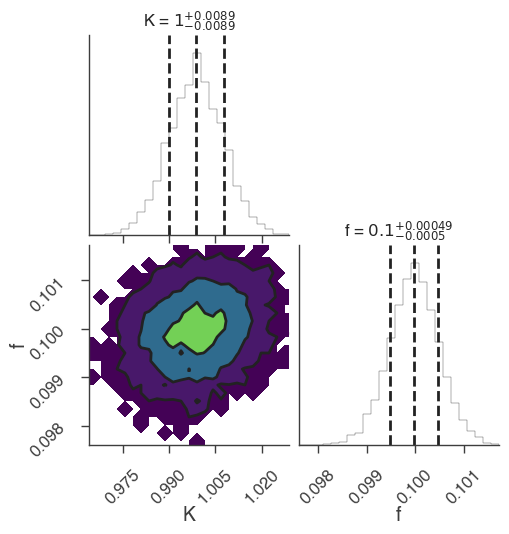

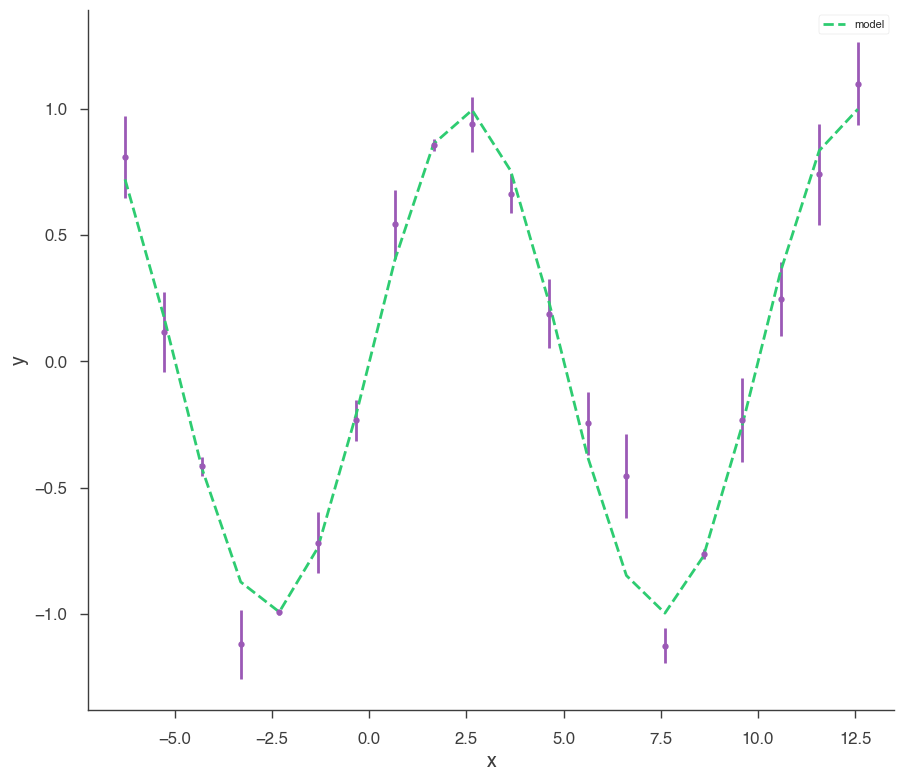

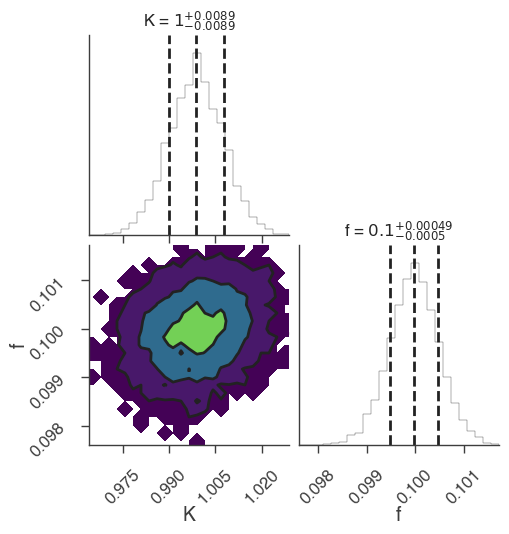

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

15:55:48 INFO      sampler set to zeus                                                     ]8;id=300474;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=784149;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   0%|          | 3/625 [00:00<00:22, 27.36it/s]

Sampling progress :   1%|          | 6/625 [00:00<00:27, 22.29it/s]

Sampling progress :   1%|▏         | 9/625 [00:00<00:27, 22.69it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:25, 24.11it/s]

Sampling progress :   3%|▎         | 18/625 [00:00<00:18, 33.65it/s]

Sampling progress :   4%|▍         | 25/625 [00:00<00:13, 43.07it/s]

Sampling progress :   5%|▌         | 32/625 [00:00<00:12, 49.33it/s]

Sampling progress :   6%|▌         | 39/625 [00:00<00:11, 53.17it/s]

Sampling progress :   7%|▋         | 45/625 [00:01<00:11, 51.01it/s]

Sampling progress :   8%|▊         | 51/625 [00:01<00:10, 52.23it/s]

Sampling progress :   9%|▉         | 57/625 [00:01<00:10, 53.27it/s]

Sampling progress :  10%|█         | 64/625 [00:01<00:09, 57.55it/s]

Sampling progress :  11%|█         | 70/625 [00:01<00:09, 58.01it/s]

Sampling progress :  12%|█▏        | 77/625 [00:01<00:09, 60.51it/s]

Sampling progress :  13%|█▎        | 84/625 [00:01<00:08, 62.21it/s]

Sampling progress :  15%|█▍        | 91/625 [00:01<00:09, 57.23it/s]

Sampling progress :  16%|█▌        | 97/625 [00:01<00:09, 53.63it/s]

Sampling progress :  16%|█▋        | 103/625 [00:02<00:10, 49.80it/s]

Sampling progress :  17%|█▋        | 109/625 [00:02<00:10, 50.08it/s]

Sampling progress :  18%|█▊        | 115/625 [00:02<00:10, 50.70it/s]

Sampling progress :  19%|█▉        | 121/625 [00:02<00:09, 52.63it/s]

Sampling progress :  20%|██        | 127/625 [00:02<00:09, 51.35it/s]

Sampling progress :  21%|██▏       | 133/625 [00:02<00:09, 51.72it/s]

Sampling progress :  22%|██▏       | 140/625 [00:02<00:08, 55.17it/s]

Sampling progress :  23%|██▎       | 146/625 [00:02<00:09, 52.45it/s]

Sampling progress :  24%|██▍       | 152/625 [00:03<00:08, 53.81it/s]

Sampling progress :  25%|██▌       | 159/625 [00:03<00:08, 57.95it/s]

Sampling progress :  26%|██▋       | 165/625 [00:03<00:09, 50.97it/s]

Sampling progress :  27%|██▋       | 171/625 [00:03<00:08, 50.48it/s]

Sampling progress :  28%|██▊       | 177/625 [00:03<00:08, 51.14it/s]

Sampling progress :  29%|██▉       | 183/625 [00:03<00:08, 50.90it/s]

Sampling progress :  30%|███       | 189/625 [00:03<00:08, 49.32it/s]

Sampling progress :  31%|███       | 195/625 [00:03<00:08, 51.22it/s]

Sampling progress :  32%|███▏      | 201/625 [00:04<00:08, 50.73it/s]

Sampling progress :  33%|███▎      | 207/625 [00:04<00:07, 52.37it/s]

Sampling progress :  34%|███▍      | 213/625 [00:04<00:07, 52.81it/s]

Sampling progress :  35%|███▌      | 220/625 [00:04<00:07, 55.23it/s]

Sampling progress :  36%|███▌      | 226/625 [00:04<00:07, 50.76it/s]

Sampling progress :  37%|███▋      | 232/625 [00:04<00:08, 48.93it/s]

Sampling progress :  38%|███▊      | 238/625 [00:04<00:07, 50.44it/s]

Sampling progress :  39%|███▉      | 244/625 [00:04<00:07, 51.68it/s]

Sampling progress :  40%|████      | 250/625 [00:04<00:07, 52.01it/s]

Sampling progress :  41%|████      | 256/625 [00:05<00:07, 50.72it/s]

Sampling progress :  42%|████▏     | 262/625 [00:05<00:06, 52.31it/s]

Sampling progress :  43%|████▎     | 269/625 [00:05<00:06, 55.11it/s]

Sampling progress :  44%|████▍     | 275/625 [00:05<00:06, 52.47it/s]

Sampling progress :  45%|████▍     | 281/625 [00:05<00:06, 52.64it/s]

Sampling progress :  46%|████▌     | 287/625 [00:05<00:06, 51.04it/s]

Sampling progress :  47%|████▋     | 293/625 [00:05<00:06, 52.49it/s]

Sampling progress :  48%|████▊     | 299/625 [00:05<00:06, 53.53it/s]

Sampling progress :  49%|████▉     | 305/625 [00:05<00:05, 53.95it/s]

Sampling progress :  50%|████▉     | 311/625 [00:06<00:06, 50.86it/s]

Sampling progress :  51%|█████     | 317/625 [00:06<00:06, 48.56it/s]

Sampling progress :  52%|█████▏    | 322/625 [00:06<00:06, 48.08it/s]

Sampling progress :  52%|█████▏    | 328/625 [00:06<00:05, 50.18it/s]

Sampling progress :  53%|█████▎    | 334/625 [00:06<00:05, 48.84it/s]

Sampling progress :  54%|█████▍    | 340/625 [00:06<00:05, 50.58it/s]

Sampling progress :  55%|█████▌    | 346/625 [00:06<00:05, 50.02it/s]

Sampling progress :  56%|█████▋    | 352/625 [00:06<00:05, 48.02it/s]

Sampling progress :  57%|█████▋    | 357/625 [00:07<00:05, 47.57it/s]

Sampling progress :  58%|█████▊    | 363/625 [00:07<00:05, 50.06it/s]

Sampling progress :  59%|█████▉    | 369/625 [00:07<00:05, 50.45it/s]

Sampling progress :  60%|██████    | 375/625 [00:07<00:04, 51.44it/s]

Sampling progress :  61%|██████    | 381/625 [00:07<00:05, 47.43it/s]

Sampling progress :  62%|██████▏   | 386/625 [00:07<00:06, 36.74it/s]

Sampling progress :  63%|██████▎   | 391/625 [00:07<00:06, 34.97it/s]

Sampling progress :  64%|██████▎   | 397/625 [00:08<00:05, 39.74it/s]

Sampling progress :  64%|██████▍   | 402/625 [00:08<00:05, 40.73it/s]

Sampling progress :  65%|██████▌   | 407/625 [00:08<00:05, 42.02it/s]

Sampling progress :  66%|██████▌   | 413/625 [00:08<00:04, 46.27it/s]

Sampling progress :  67%|██████▋   | 419/625 [00:08<00:04, 49.35it/s]

Sampling progress :  68%|██████▊   | 425/625 [00:08<00:04, 48.38it/s]

Sampling progress :  69%|██████▉   | 431/625 [00:08<00:03, 49.23it/s]

Sampling progress :  70%|██████▉   | 437/625 [00:08<00:03, 49.35it/s]

Sampling progress :  71%|███████   | 443/625 [00:08<00:03, 51.10it/s]

Sampling progress :  72%|███████▏  | 449/625 [00:09<00:03, 52.12it/s]

Sampling progress :  73%|███████▎  | 455/625 [00:09<00:03, 53.48it/s]

Sampling progress :  74%|███████▍  | 461/625 [00:09<00:03, 51.37it/s]

Sampling progress :  75%|███████▍  | 467/625 [00:09<00:03, 52.58it/s]

Sampling progress :  76%|███████▌  | 473/625 [00:09<00:02, 53.02it/s]

Sampling progress :  77%|███████▋  | 479/625 [00:09<00:02, 51.09it/s]

Sampling progress :  78%|███████▊  | 485/625 [00:09<00:02, 52.01it/s]

Sampling progress :  79%|███████▊  | 491/625 [00:09<00:02, 50.76it/s]

Sampling progress :  80%|███████▉  | 497/625 [00:10<00:02, 50.40it/s]

Sampling progress :  80%|████████  | 503/625 [00:10<00:02, 48.68it/s]

Sampling progress :  81%|████████▏ | 508/625 [00:10<00:02, 48.43it/s]

Sampling progress :  82%|████████▏ | 514/625 [00:10<00:02, 49.45it/s]

Sampling progress :  83%|████████▎ | 519/625 [00:10<00:02, 43.43it/s]

Sampling progress :  84%|████████▍ | 525/625 [00:10<00:02, 45.72it/s]

Sampling progress :  85%|████████▍ | 531/625 [00:10<00:01, 49.32it/s]

Sampling progress :  86%|████████▌ | 537/625 [00:10<00:01, 50.37it/s]

Sampling progress :  87%|████████▋ | 543/625 [00:10<00:01, 52.07it/s]

Sampling progress :  88%|████████▊ | 550/625 [00:11<00:01, 56.53it/s]

Sampling progress :  89%|████████▉ | 556/625 [00:11<00:01, 48.79it/s]

Sampling progress :  90%|████████▉ | 562/625 [00:11<00:01, 47.64it/s]

Sampling progress :  91%|█████████ | 567/625 [00:11<00:01, 47.43it/s]

Sampling progress :  92%|█████████▏| 572/625 [00:11<00:01, 39.82it/s]

Sampling progress :  92%|█████████▏| 577/625 [00:11<00:01, 31.81it/s]

Sampling progress :  93%|█████████▎| 581/625 [00:12<00:01, 27.10it/s]

Sampling progress :  94%|█████████▎| 585/625 [00:12<00:01, 28.64it/s]

Sampling progress :  94%|█████████▍| 589/625 [00:12<00:01, 30.75it/s]

Sampling progress :  95%|█████████▍| 593/625 [00:12<00:01, 30.52it/s]

Sampling progress :  96%|█████████▌| 597/625 [00:12<00:00, 30.84it/s]

Sampling progress :  96%|█████████▌| 601/625 [00:12<00:00, 32.59it/s]

Sampling progress :  97%|█████████▋| 605/625 [00:12<00:00, 34.16it/s]

Sampling progress :  98%|█████████▊| 610/625 [00:12<00:00, 35.82it/s]

Sampling progress :  98%|█████████▊| 614/625 [00:13<00:00, 35.83it/s]

Sampling progress :  99%|█████████▉| 619/625 [00:13<00:00, 36.86it/s]

Sampling progress : 100%|█████████▉| 623/625 [00:13<00:00, 36.67it/s]

Sampling progress : 100%|██████████| 625/625 [00:13<00:00, 46.89it/s]

15:56:02 INFO      fit restored to maximum of posterior                                         ]8;id=179627;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=674367;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=196182;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=571118;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 8


Scale Factor: 0.925782


Mean Integrated Autocorrelation Time: 2.89


Effective Sample Size: 4328.67


Number of Log Probability Evaluations: 67594


Effective Samples per Log Probability Evaluation: 0.064039


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.99 +/- 0.09) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(10.00 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.293825
total,-9.293825


Values of statistical measures:

,statistical measures
AIC,23.293532
BIC,24.579114
DIC,22.588797
PDIC,1.999178


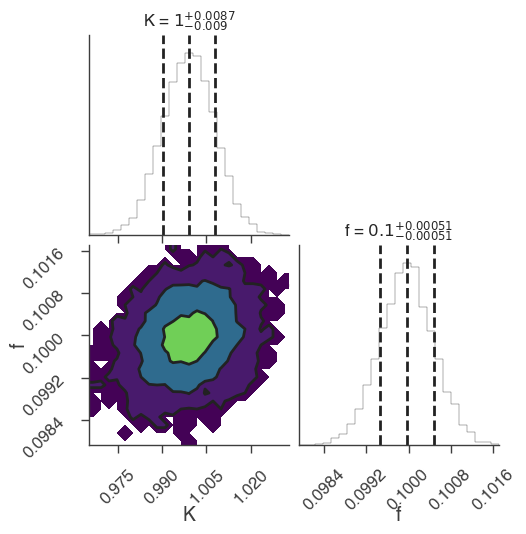

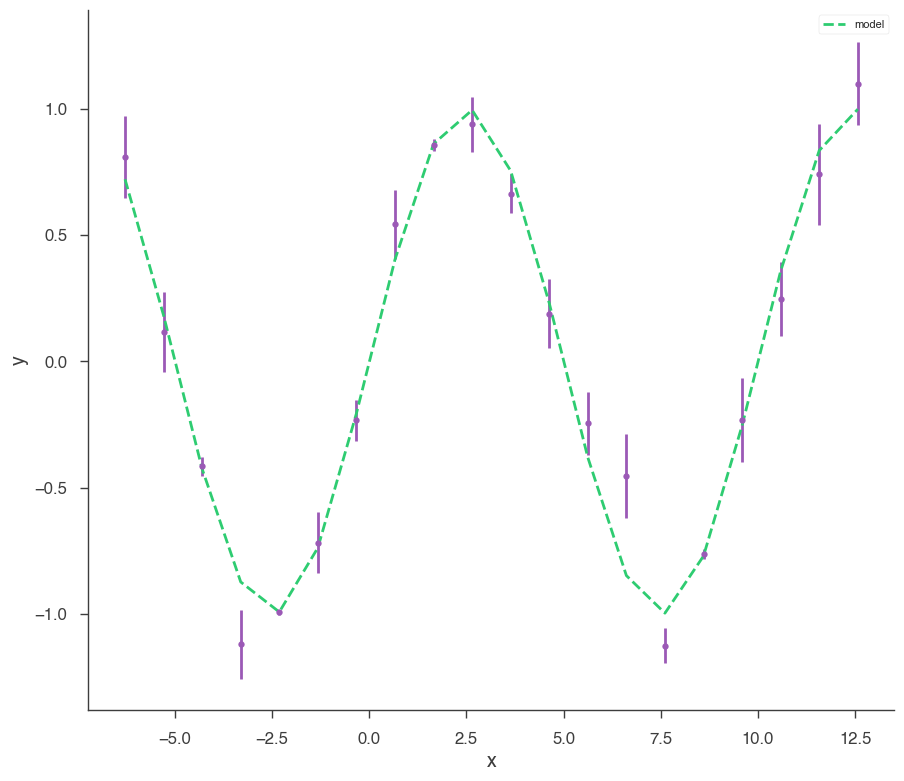

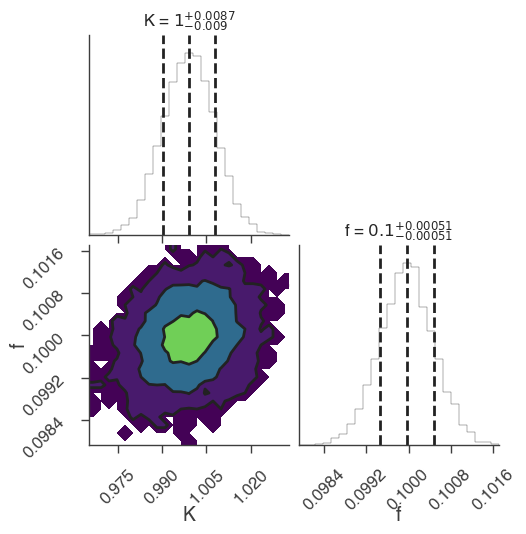

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

15:56:04 INFO      sampler set to ultranest                                                ]8;id=190505;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=111611;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-9  


[ultranest] Likelihood function evaluations: 6610


[ultranest]   logZ = -19.12 +- 0.1133


[ultranest] Effective samples strategy satisfied (ESS = 981.9, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.05 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.11 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


15:56:18 INFO      fit restored to maximum of posterior                                         ]8;id=620455;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=107037;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=386286;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=976240;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.99 -0.08 +0.09) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.000 +/- 0.005) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-9.294917
total,-9.294917


Values of statistical measures:

,statistical measures
AIC,23.295717
BIC,24.581299
DIC,22.563820
PDIC,1.987639
log(Z),-8.306705


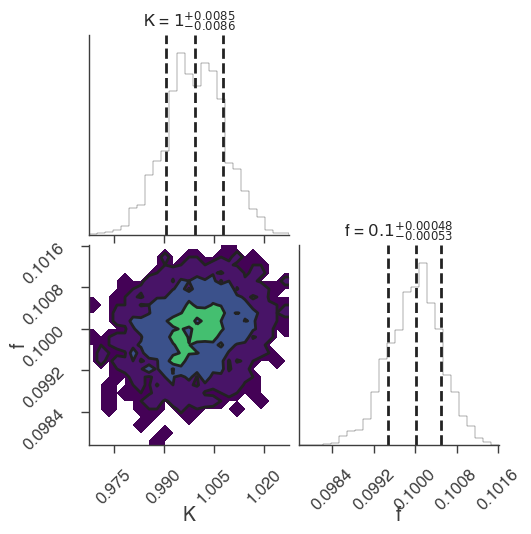

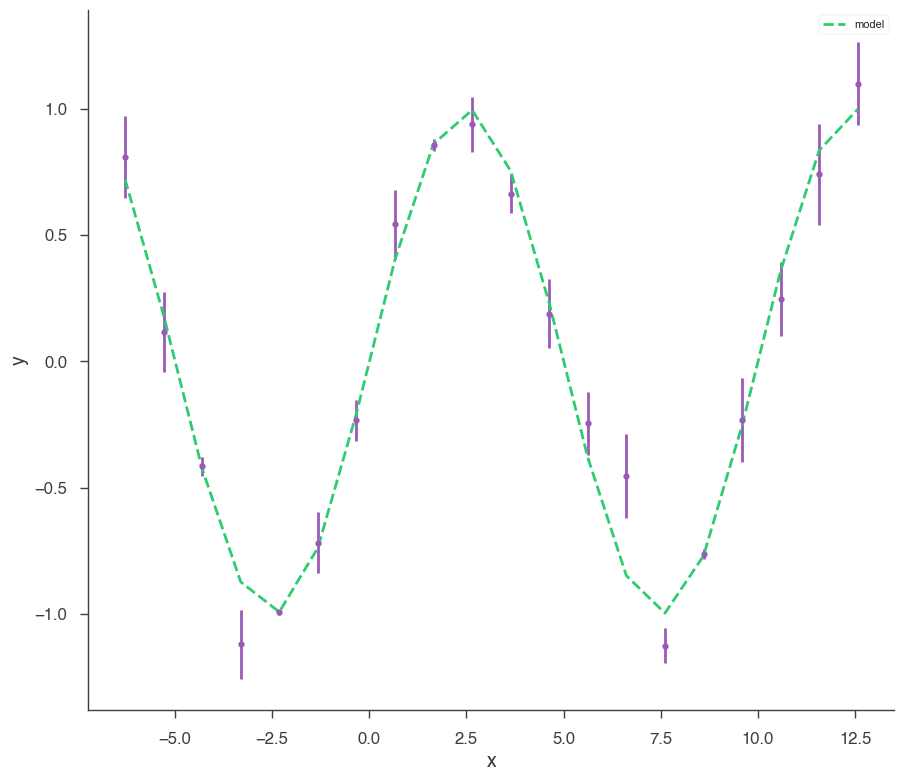

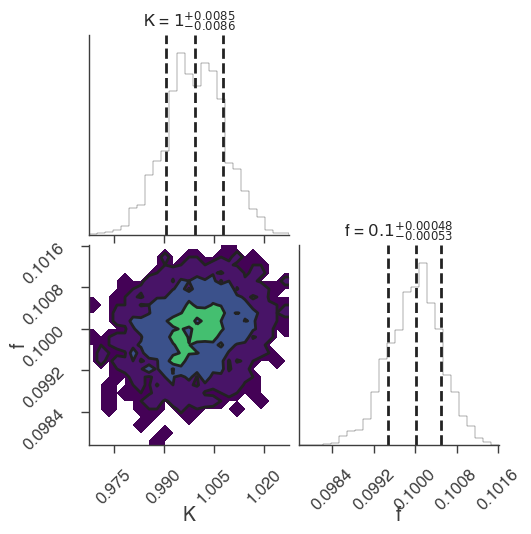

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()